<a href="https://colab.research.google.com/github/mickeykubo/analytics_book/blob/master/statsmodels1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python言語によるビジネスアナリティクス
## 実務家のための最適化，統計分析，機械学習（近代科学社）

## statsmodelsを用いた統計の例題と練習問題


### 線形回帰

http://logopt.com/data/Diamond.csv からダイアモンドの価格データを読み込み，線形回帰を適用する．

列は ["carat","colour","clarity","certification","price"] であり，他の情報から価格(price)の予測を行う．

1. データをpandasのデータフレームとして読み込む．
2. statsmodels.formula.apiを **smf** (stats model formula)の名前でインポートする．
3. smfの一般化線形モデル**glm**を用いてモデルインスタンスを生成する．
このとき，列名を用いた**式(formula)**を文字列で記述し引数**formula**で，データは引数**data**にデータフレームとして入力する．
4. モデルインスタンスの**fitメソッド**で学習を行う．
5. モデルインスタンスの**summary(2)**メソッドで結果を見る．

モデル式の**formula**の書き方については，教科書194ページを参照

In [1]:
import pandas as pd
%matplotlib inline
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


In [2]:
import statsmodels.formula.api as smf
model = smf.glm('price ~ carat + colour + clarity +certification', diamond) 
fit = model.fit()                                
print(fit.summary2())    

                       Results: Generalized linear model
Model:                   GLM                 AIC:               4931.3248     
Link Function:           identity            BIC:               148870958.0331
Dependent Variable:      price               Log-Likelihood:    -2452.7       
Date:                    2019-01-11 09:08    LL-Null:           -2941.3       
No. Observations:        308                 Deviance:          1.4887e+08    
Df Model:                12                  Pearson chi2:      1.49e+08      
Df Residuals:            295                 Scale:             5.0465e+05    
Method:                  IRLS                                                 
------------------------------------------------------------------------------
                       Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
------------------------------------------------------------------------------
Intercept              169.1760 255.0156   0.6634 0.5071  -330.6454   668.

### サマリーの見方

- No. Observations : サンプル数 (=308)
- Df Model : 自由度(Degree of Freedom) 変数の数なので $12$   
- AIC : [赤池情報量基準(Akaike Information Criterion) ](https://ja.wikipedia.org/wiki/%E8%B5%A4%E6%B1%A0%E6%83%85%E5%A0%B1%E9%87%8F%E8%A6%8F%E6%BA%96)
($=4931.3248 = -2 \times 対数尤度 + 2 \times (自由度+1) = -2 \times (-2452.7) +2 \times (12+1)$ )　(小さいほどモデルの適合度が良い）
- Log-Likelihood: 尤度の対数（最大尤度のものを求めている）[最尤推定](https://ja.wikipedia.org/wiki/%E6%9C%80%E5%B0%A4%E6%8E%A8%E5%AE%9A)
- Corf. : 係数（一番上のInterceptはy切片）
- Std. Err. : 標準誤差
- z : 標準偏差．大きいほど係数が信頼できる
- P : P値（偶然|z|を超える確率）．小さいほど係数が信頼できる（以下の表参照）
- [0.025, 0.975] : 係数の信頼区間

| z (標準偏差) | P値 (確率） | 信頼度 |
|:-----------|------------:|:------------:|
| < -1.65 または > +1.65 | < 0.10 | 90%
| < -1.96 または > +1.96 | < 0.05 | 95%
| < -2.58 または > +2.58 |  < 0.01 | 99%  


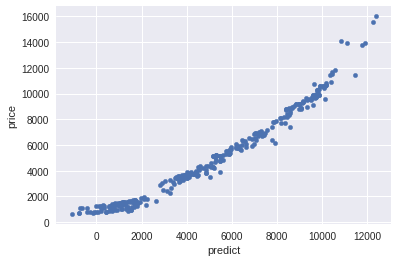

In [3]:
diamond['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
diamond.plot.scatter(x='predict',y='price'); #描画

### 問題

http://logopt.com/data/carprice.csv から車の価格データを読み込み，線形回帰による予測を行え．

車種(Type)，100マイル走る際のガロン数（gpm100），都市部での1ガロンあたりの走行距離（MPGcity），高速道路での１ガロン当たりの走行距離（MPGhighway）から，価格(Price)を予測せよ．

### 問題

広告のデータ http://logopt.com/data/Advertising.csv を読み込み，線形回帰による予測を行え．

テレビ(TV)，ラジオ(Radio)，新聞(Newspaper)への広告から売り上げ(Sales)を予測せよ．

### 問題

http://logopt.com/data/Boston.csv のBostonの住宅データを用いて回帰分析を行え．

データの詳細については，
https://archive.ics.uci.edu/ml/datasets/Housing
を参照せよ．

medvが住宅の価格で，他のデータ（犯罪率や人口など）から予測する．

### 問題

http://logopt.com/data/SATGPA.csv データを用いて，2種類のSATの成績からGPAを予測せよ．

### 一般化線形モデルについて

基本となる線形回帰だと，独立変数 $x^{(i)}$ を用いて従属変数 $y^{(i)}$ を推定する．上付き添え字の$(i)$ はトレーニングデータのインデックスを表す．評価関数は最小自乗誤差であり，それを最小にするような重みベクトル $w$ を求める．

通常の線形回帰（最小自乗モデル）は，一般化線形モデル的に見直すと以下のように解釈できる．

1. 従属変数 $y^{(i)}$ は平均 $\mu^{(i)}$，標準偏差 $\sigma$ の正規分布 $N(\mu^{(i)},\sigma^2)$ にしたがう．
2. 線形予測子 $z^{(i)}$ を独立変数 $x^{(i)}$ を用いて $z^{(i)} = w x^{(i)} $ と定義する．ここで $w$ は最適化するパラメータ（重み）である．
3. リンク関数 $g$ を用いて  $\mu^{(i)}$ と  $z^{(i)}$ を繋ぐが，線形モデルでは $g(\mu) =\mu$ である．

### ロジスティック回帰

titanicデータを用いる(データの詳細については教科書82ページ参照）．

従属変数（予測するもの）は*survived*の列で，生き残ったか($=1$)，否か($=0$)を表す．

このように $0$ か $1$ かを予測するのに線形回帰は不適当なので，ロジスティック回帰を用いる．

一般化線形モデル(glm)を使えば，ほぼ同じように予測できる（性別sexと客室クラスpclassだけを用いる）．

引数の*family* に *sm.families.Binomial()* を指定すれば良い．

一般化線形モデルでの仮定は以下のようになる．

1. 従属変数 $y^{{i}}$ は平均 $\mu^{(i)}$ （表が出る確率）のコイン投げの分布(2項分布:binomial distribution)にしたがう．
2. 線形予測子 $z^{(i)}$ を独立変数 $x^{(i)}$ を用いて $z^{(i)} = w x^{(i)} $ と定義する．(この部分は全部共通）
3. リンク関数 $g$ を用いて  $\mu^{(i)}$ と  $z^{(i)}$ を繋ぐが，$\mu$ は確率なので $[0,1]$ の範囲しかとらない，一方， $z$ は線形予測子なので $[-\infty,+\infty]$ の定義域をもつ．これを繋ぐために以下のリンク関数 $g$ を用いる．

$$z = g(\mu) = \log \left( \frac{\mu}{1-\mu} \right) $$

これをロジット関数とよぶ．
歴史的な都合で $g$ は $\mu$ から $z$ への写像となっているが，逆写像として考えた方がわかりやすい．すなわち，線形予測子 $z$ から分布の平均 $\mu$ を逆写像 $g^{-1}$ で写すのである．この関数は


$$\mu = \frac{ \exp (z) }{ 1+\exp (z)} $$ となり，いわゆるロジスティック関数である．


### 例題

titanic号で生存したか否かの[データセット](https://www.kaggle.com/c/titanic/data)にロジスティック回帰を適用してみる．


In [4]:
titanic = pd.read_csv('http://logopt.com/data/titanic.csv',index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import statsmodels.api as sm
model = smf.glm(formula="Survived ~ Sex + Pclass + Fare + SibSp + Parch", data=titanic, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


               Results: Generalized linear model
Model:              GLM              AIC:            828.7501  
Link Function:      logit            BIC:            -5194.4747
Dependent Variable: Survived         Log-Likelihood: -408.38   
Date:               2019-01-11 09:08 LL-Null:        -593.33   
No. Observations:   891              Deviance:       816.75    
Df Model:           5                Pearson chi2:   910.      
Df Residuals:       885              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       3.1473   0.3752   8.3895 0.0000  2.4121  3.8826
Sex[T.male]    -2.7594   0.1959 -14.0837 0.0000 -3.1434 -2.3754
Pclass         -0.8360   0.1268  -6.5905 0.0000 -1.0846 -0.5874
Fare            0.0034   0.0024   1.4508 0.1468 -0.0012

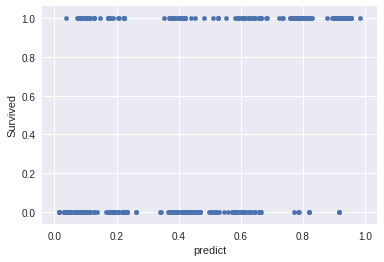

In [6]:
titanic['predict'] = res.predict()  #予測をpredict列に保管
titanic.plot.scatter(x='predict',y='Survived'); # 散布図に描画

### 問題

"http://logopt.com/data/cancer.csv" にある胸部癌か否かを判定するデータセットを用いて分類を行え．

最初の列diagnosisが癌か否かを表すものであり，'M'が悪性（malignant），'B'が良性（benign）である．

必要なら以下の文字列を切り貼りして用いよ．

formula = """diagnosis~radius_mean+texture_mean+texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+
concavity_mean+symmetry_mean+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+
compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst"""

In [7]:
cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 問題

"http://logopt.com/data/hospital.csv" にある病院のデータを用いてロジスティック回帰を行え．

従属変数*died*は死亡したか否かを表し，これを年齢(age)，施術(procedure)，性別(gender)，救急か否か(type)，入院日数(los: length of stay)から予測する． 

必要なら以下の文字列を使用しても良い．

formula="died~procedure+age+gender+los+type" 


In [8]:
hospital = pd.read_csv("http://logopt.com/data/hospital.csv", index_col=0)
hospital.head()

,died,procedure,age,gender,los,type
1,0,1,73,0,51,0
2,0,0,67,0,30,1
3,0,1,69,0,43,0
4,0,1,65,0,32,0
5,0,1,79,0,42,1


### Poisson回帰

Poisson回帰は救急車の出動回数などの負の値をとらない**カウントデータ**もしくはその発生率を予測する際に用いられる．

この場合には，従属変数が $0$ 以上の値になるので，一般化線形モデルでの仮定は以下のようになる．

1. 従属変数 $y^{{i}}$ は平均 $\mu^{(i)}$ のPoisson分布にしたがう．
2. 線形予測子 $z^{(i)}$ を独立変数 $x^{(i)}$ を用いて $z^{(i)} = w x^{(i)} $ と定義する．(この部分は全部共通）
3. リンク関数 $g$ を用いて  $\mu^{(i)}$ と  $z^{(i)}$ を繋ぐが，$\mu$ は $0$ 以上で $z$ は $[-\infty,+\infty]$ の定義域をもつ．これを繋ぐために以下のリンク関数 $g$ を用いる．

$$z = g(\mu) = \log (\mu)$$

$g$ の逆写像は指数関数
$$ \mu = \exp (z) $$ である．

一般化線形モデル(glm)を使えば，ほぼ同じように予測できる．

引数の*family* に *sm.families.Poisson()* を指定すれば良い．

### 例題

"http://logopt.com/data/hospital-stay.csv" にある病院の入院日数のデータセットを用いてPoisson回帰を解説する．
従属変数である*los*（入院日数：length of stay)を，性別(gender)，救急か否か(type1)，75歳以上か(age75)から予測する．

入院日数は負の値をとらない，いわゆるカウントデータであるので，Poisson回帰を適用する．

In [0]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [10]:
hospital = pd.read_csv("http://logopt.com/data/hospital-stay.csv",index_col=0)
hospital.head()

,los,gender,type1,age75
1,53,0,1,0
2,30,0,1,0
3,28,0,1,1
4,22,0,1,0
5,25,0,1,0


In [11]:
model = smf.glm(formula="los ~ gender + type1 + age75 ", data=hospital, family= sm.families.Poisson() )
res = model.fit()
print(res.summary2())

                Results: Generalized linear model
Model:              GLM              AIC:            9178.5450  
Link Function:      log              BIC:            -10080.9611
Dependent Variable: los              Log-Likelihood: -4585.3    
Date:               2019-01-11 09:08 LL-Null:        -4975.9    
No. Observations:   1798             Deviance:       3364.0     
Df Model:           3                Pearson chi2:   4.16e+03   
Df Residuals:       1794             Scale:          1.0000     
Method:             IRLS                                        
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept     1.1822    0.0276  42.8441  0.0000   1.1282   1.2363
gender       -0.1475    0.0218  -6.7523  0.0000  -0.1903  -0.1047
type1         0.6280    0.0258  24.3094  0.0000   0.5774   0.6787
age75         0.1298    0.0232   5

### 問題
"http://logopt.com/data/fishing.csv" にある魚の数を予測するためのデータセットにPoisson回帰を適用せよ．
従属変数は魚の数を表す totabundであり，それを密度(density)，平均深度(meandepth)，年度(year)から予測せよ．

必要なら以下の文字列を用いよ．

formula="totabund ~ density + meandepth + year "


In [12]:
fish = pd.read_csv("http://logopt.com/data/fishing.csv",index_col=0)
fish.head()

,site,totabund,density,meandepth,year,period,sweptarea
1,1,76,0.002070,804,1978,1977-1989,36710.000000
2,2,161,0.003520,808,2001,2000-2002,45741.253906
3,3,39,0.000981,809,2001,2000-2002,39775.000000
4,4,410,0.008039,848,1979,1977-1989,51000.000000
5,5,177,0.005933,853,2002,2000-2002,29831.251953
